In [2]:
from textwrap import dedent
%matplotlib inline
import math
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import codecs
from datetime import datetime
from scipy.ndimage import gaussian_filter

matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (15.0, 5.0)    # resize plots

def code_hider():
    """Make a button in the jupyter notebook to hide all code"""
    # Stolen from stackoverflow... forget which question
    # I would really like these buttons for every individual cell.. but I don't know how
    from IPython.display import HTML    # Please keep here, don't want hax to depend on ipython!
    return HTML(dedent('''
                       <script>
                       code_show=true
                       function code_toggle() {
                        if (code_show){
                        $('div.input').hide();
                          } else {
                        $('div.input').show();
                        }
                        code_show = !code_show
                       }
                       //$( document ).ready(code_toggle);
                       </script>
                       <form action="javascript:code_toggle()"><input type="submit"
                       value="Show/hide  all code in this notebook"></form>'''))

code_hider()


# Calibration d'un photomultiplicateur (PMT) avec des sources radioactives

**Auteurs**: Ioana. C. Maris et Sébastien Robert


Dans cette expérience vous allez apprendre à calibrer un détecteur. Vous devrez obtenir deux choses: l'échelle du détecteur et sa résolution. Le détecteur que l'on veut calibrer contient un scintillateur, un photomultiplicateur et une chaîne d'acquisition de données. Ces notes sont une ligne directrice de ce labo: c'est à vous de trouver les réponses aux questions pendant le labo, en demandant aux personnes en charge.

<div class="alert alert-block alert-danger">
<b>Sécurité</b> 

Dans ce laboratoire, vous manipulerez des sources radioactives. Voici quelques règles élémentaires de sécurité:

<ul>
<li> Manipulez toujours les sources avec la pince prévue à cet effet;
<li> Le plomb est un matériau toxique: utilisez des gants pour le manipuler    
<li> Ne laissez jamais les sources exposées à l'air libre, il faut les mettre dans le chateau de plomb;
<li> Les sources ne peuvent pas sortir du labo;
<li> Ne pas boire ni manger dans le labo
<li> Lavez-vous les mains en sortant du labo (surtout si vous avez touché le plomb).
    
</ul>

<p style="font-weight: bold"> Vous êtes responsables des sources; En cas de perte, vous ne sortez pas du labo tant qu'elles ne sont pas toutes retrouvées (quitte à y passer la nuit). </p>
</div>


<div class="alert alert-block alert-success">
<b> Important: </b> Amenez vos ordinateurs avec python est Jupyter notebook préalablement installés ainsi qu'une clé USB. 
</div>



## Travail préparatif au laboratoire (2 points)

Avant de venir au laboratoire, lisez les notes et répondez aux questions suivantes : 

1. Expliquez comment calibrer le détecteur et pourquoi cela est nécéssaire, faite une esquisse du graphique que vous devez obtenir __(1.5 points)__
2. Qu'est ce que représente la largeur des pics observés ? __(0.5 points)__

##  Manipulation à effectuer
1. Mesurez le nombre d'evenements par seconde avec le scaler
1. Prenez le spectre de differentes sources connues (maximum 3). Les sources indispensables sont ${}^{137}\mathrm{Cs}$ et ${}^{152}\mathrm{Eu}$.   
1. Prenez le spectre d'une source inconnue
1. Prenez le spectre du bruit de fond

<div class="alert alert-block alert-success">
<p><b>Tip:</b>  L'accumulation d'une quantité suffisante d'évènements du bruit de fond prend du temps, commencez par utiliser les sources. </p>
</div>



## Analyse et interprétation des données 
1. Calculez le taux d'évènement du bruit du fond et du ${}^{137}\mathrm{Cs}$ avec le scaler (prenez au mois 10 mesures à chaque fois et calculez l'écart-type). __(1 point)__

1. Prenez le Jupyter notebook (sur l'UV) et adaptez-le afin qu'il puisse lire vos données. Commencez par le ${}^{137}\mathrm{Cs}$. 

1. En plus des pics de désintégration, les spectres comportent des contributions dues à la diffusion Compton des photons incidents. Identifiez-les et analyser en détail les contributions de cette diffusion dans le spectre du ${}^{137}\mathrm{Cs}$. __(2 points)__

1. Sélectionnez les pics dans vos mesures et ajustez-les avec une fonction gaussienne pour obtenir la moyenne et la largeur des pics. Associez une valeur théorique d'énergie à au moins 5 pics en vous servant des tables de désintégrations. __(2.5 points)__

1. Calibrez le détecteur en trouvant la relation linéaire entre l'énergie du photon incident et l'unité arbitraire du système numérique. Pour cela, faites une régression linéaire. Interprétez les paramètres obtenus et leurs incertitudes. __(5 points)__

1. Déterminez la résolution absolue (en eV) et relative (en %) du détecteur en fonction de l'énergie et essayez d'en comprendre le comportement. __(4 points)__

1. Utilisez la courbe de calibration que vous avez obtenue et le temps de mesure afin de convertir le spectre de la source inconnue en fréquence en fonction de l'énergie. Quelle est l'énergie des pics présents dans la source inconnue? Comparez ces résultats à la littérature pour trouver la source radioactive. __(2 points)__

Vous pouvez gagner des points supplémentaires en faisant des analyses originales. (__chaque tiret correspond à 1 point bonus__):

- Vous disposez de trois mesures du pic du plomb (une pour chaque spectre). Peut-on les considérer comme indépendantes ?  Comparez les mesures et interprétez les résultats.

- Interpretez le bruit de fond de manière originale (comparez avec les mesures prises dans l'experience Geiger ou utilisez le scalers) 

- Réalisez un ajustement unique pour les trois pics du ${}^{133}\mathrm{Ba}$ qui se superposent

- Déduisez l'efficacité du détecteur

<div class="alert alert-block alert-success">
<b>Tip:</b> N'hésitez pas à poser des questions aux encadrants du labo pour plus de conseils.
</div>
 

## Rapport (18 points)

Le rapport (format A4, min 10 en taille de police et maximum 4 pages) doit contenir :

- Une introduction expliquant le dispositif expérimental, incluant : le fonctionnement d'un PMT, d'un scintillateur, d'un ADC et d'un microcontroleur.(max 1 page,__1 point__)

- Une analyse de données (max 2.5 pages, __16.5 points__):

    - L'identification des pics, la calibration et la résolution du détecteur. Attention aux titres des axes et unités. 

    - Interprétation des résultats (voir ci-dessus)

- Une conclusion incluant les points positifs et ce qu'il faut améliorer. (max 0.5 page, __0.5 points__) 

Mettez les graphiques des ajustements gaussiens en annexe. Les points bonus et les graphiques ne comptent pas dans les 4 pages.   


<div class="alert alert-block alert-success">
<b>Tip:</b> Vous pouvez utiliser Jupyter Notebook pour écrire votre rapport en Markdown ou bien écrire le rapport en LaTex.</p>
<b>Tip:</b> Pour l'introduction, essayez de répondre aux questions qui sont dans ces notes </p>
</div>


## Dispositif expérimental

Le dispositif expérimental comprend un détecteur, un système d'acquisition de données et des sources radioactives. 

**Détecteur** Le détecteur que vous allez utiliser comprend une plaque métallique derrière laquelle est placé un scintillateur relié à un tube photomultiplicateur (PM). Le scintillateur du labo est constitué d'un cristal de NaI. Il s'agit d'un matériau qui émet de la lumière visible (ou UV) lorsqu'il est traversé par des particules ionisantes. En particulier, le nombre de photons produits est proportionnel à l'énergie déposée. Cette lumière arrive ensuite sur une photocathode qui converti les photons en électrons par effet photo-électrique (absorption d’un photon par un atome avec l’éjection d’un electron de l'atome). Le nombre d'électrons produit est proportionnel au nombre de photons incidents. Ensuite, les électrons vont passer dans le photomulitplicateur où ils vont être accélérés par une grande différence de potentiel appliquée entre des électrodes (appelées dynodes). Cela aura pour effet d'arracher des électrons aux dynodes et de multiplier le nombre d'électrons total jusqu'à l'anode (voir schéma ci-dessous). Le signal lu sur l´anode est une impulsion électrique dont l'intensité est proportionnelle à l'énergie des particules qui traversent le scintillateur.([source de l'image](https://commons.wikimedia.org/wiki/File:Tubephotomultiplicateur.svg)):



![Schématique du tube PM](images/Photomultiplicateur.png)




<div class="alert alert-block alert-info">
<p><b>Q:</b>  Pourquoi on a besoin du scintillateur et comment est-ce qu'il fonctionne? </p>
<p><b>Q:</b>  Si le scintillateur mesure seulement des particules chargées, comment mesure-t-on les photons? </p>
<p><b>Q:</b>  Pourquoi y-a-t-il une plaque métallique devant le scintillateur? </p>
<p><b>Q:</b>  Quel est le processus par lequel on peut extraire des électrons de la photocadode?</p>
<p><b>Q:</b>  Est-ce que vous pouvez donner des exemples ou on utilise des photomultiplicateurs? </p>
<p><b>Q:</b>  Quelle est la haute tension que l´on applique sur le PM? Que se passe-t-il si on la modifie? </p>

</div>

**Système d'acquisition de données** 
Dans le montage utilisé au laboratoire, le courant qui sort du photomultiplicateur est amplifié, puis transformé en signal numérique par un ADC (convertisseur analogique-digital). Ensuite, le signal est envoyé à l'ordinateur à l'aide d'un microcontrôleur. Le spectre obtenu affiche alors un nombre de coups en fonction de "canaux" (ADC bits) qui prennent des valeurs discrètes 0 à $C_{ADC}$, où $C_{ADC}$ est une constante réglable sur l'ADC ( pour ce labo, il est recommander de choisir minimum $C_{ADC}=1024$). Il existe une relation linéaire entre le canal attribué à une détection et l'énergie de la particule associée. Pour la déterminer, il est néccéssaire de réaliser une calibration.

Vous avez également à votre disposition un scaler pour mesurer la fréquence à laquelle des particules sont détectées et un oscilloscope pour visualiser les impulsions générées par la détection de particules.

Sur la photo ci-dessous, on a, dans le bloc de droite: le générateur de tension pour le photomultiplicateur, l'amplificateur, l'ADC (respectivement de gauche à droite) et dans le bloc de gauche on a deux scalers connectés à un amplificateur. 

![DAQ](images/daq.jpg)

<div class="alert alert-block alert-info">
<p><b>Q:</b>  Quelle est l'amplification que vous utilisez dans cette expérience? </p>
<p><b>Q:</b>  A quoi correspondent les valeurs de numérisation de l'ADC ? </p>
<p><b>Q:</b>  Optionelle: Quelle est la différence entre les mesures du bruit de fond avec le compteur Geiger et cette expérience? (si vous avez déjá fait cette experience) </p>
</div>

<div class="alert alert-block alert-success">
<p><b>Tip:</b> Regardez sur l'oscilloscope la forme du signal </p>
<p><b>Tip:</b> Comparez le nombre d´évènements pris avec le scaler et la mesure du bruit du fond </p>
</div>

**Schéma récapitulatif du dispositf expérimental**
![ChaineAcquisition](images/ImagePMT.png)

**Calibration et sources radioactives** Pour calibrer le détecteur, on utilise des sources radioactives dont on connait l'énergie des particules émises. Vous avez à votre disposition plusieurs sources: ${}^{137}\mathrm{Cs}$, ${}^{133}\mathrm{Ba}$, ${}^{60}\mathrm{Co}$, ${}^{22}\mathrm{Na}$, ${}^{241}\mathrm{Am}$, ${}^{152}\mathrm{Eu}$. Voici un tableau qui reprend les énergies théoriques des photons émis par les sources avec une intensité absolue supérieure à 1%:

<table style="border-collapse: collapse; width: 100%;">
  <tr style="background-color: #555; color: white; font-weight: bold;">
    <th style="border: 1px solid black; padding: 5px;">Element</th>
    <th style="border: 1px solid black; padding: 5px;">Nature du rayonnement</th>
    <th style="border: 1px solid black; padding: 5px; text-align:left;">$E_\gamma$ (keV)</th>
    <th style="border: 1px solid black; padding: 5px; text-align:left;">$I_{(\gamma)}$ (%)</th>
  </tr>

  <!-- Cs -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{137}\mathrm{Cs}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">661.657</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">85.1</td>
  </tr>
  <tr style="border-bottom: 3px solid black;">
    <td style="border: 1px solid black; padding: 5px;"></td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Fluorescence (rayons X)</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">31–37</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;"></td>
  </tr>

  <!-- Ba -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{133}\mathrm{Ba}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">53.1622</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">2.14</td>
  </tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">79.6142</td><td style="border: 1px solid black; padding: 5px; text-align:left;">2.65</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">80.9979</td><td style="border: 1px solid black; padding: 5px; text-align:left;">32.9</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">276.3989</td><td style="border: 1px solid black; padding: 5px; text-align:left;">7.16</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">302.8508</td><td style="border: 1px solid black; padding: 5px; text-align:left;">18.34</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">356.0129</td><td style="border: 1px solid black; padding: 5px; text-align:left;">62.05</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">383.8485</td><td style="border: 1px solid black; padding: 5px; text-align:left;">8.94</td></tr>
  <tr style="border-bottom: 3px solid black;"><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">Fluorescence (rayons X)</td><td style="border: 1px solid black; padding: 5px; text-align:left;">30–36</td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td></tr>

  <!-- Eu -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{152}\mathrm{Eu}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">121.7817</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">28.53</td>
  </tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">244.6974</td><td style="border: 1px solid black; padding: 5px; text-align:left;">7.55</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">344.2785</td><td style="border: 1px solid black; padding: 5px; text-align:left;">26.59</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">411.1165</td><td style="border: 1px solid black; padding: 5px; text-align:left;">2.237</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">443.9606</td><td style="border: 1px solid black; padding: 5px; text-align:left;">2.827</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">778.9045</td><td style="border: 1px solid black; padding: 5px; text-align:left;">12.93</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">867.380</td><td style="border: 1px solid black; padding: 5px; text-align:left;">4.230</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">964.057</td><td style="border: 1px solid black; padding: 5px; text-align:left;">14.51</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1085.837</td><td style="border: 1px solid black; padding: 5px; text-align:left;">10.11</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1089.737</td><td style="border: 1px solid black; padding: 5px; text-align:left;">1.734</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1112.076</td><td style="border: 1px solid black; padding: 5px; text-align:left;">13.67</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1212.948</td><td style="border: 1px solid black; padding: 5px; text-align:left;">1.415</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1299.142</td><td style="border: 1px solid black; padding: 5px; text-align:left;">1.633</td></tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1408.013</td><td style="border: 1px solid black; padding: 5px; text-align:left;">20.87</td></tr>
  <tr style="border-bottom: 3px solid black;"><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">Fluorescence (rayons X)</td><td style="border: 1px solid black; padding: 5px; text-align:left;">39–47</td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td></tr>

  <!-- Am -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{241}\mathrm{Am}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">26.3446</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">2.27</td>
  </tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">59.5409</td><td style="border: 1px solid black; padding: 5px; text-align:left;">35.9</td></tr>
  <tr style="border-bottom: 3px solid black;"><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">Fluorescence (rayons X)</td><td style="border: 1px solid black; padding: 5px; text-align:left;">11–22</td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td></tr>

  <!-- Na -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{22}\mathrm{Na}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">1274.537</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">99.940</td>
  </tr>
  <tr><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">Annihilation $e^+$ $e^-$</td><td style="border: 1px solid black; padding: 5px; text-align:left;">511.000</td><td style="border: 1px solid black; padding: 5px; text-align:left;">~180</td></tr>

  <!-- Co -->
  <tr>
    <td style="border: 1px solid black; padding: 5px;">${}^{60}\mathrm{Co}$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">Rayons $\gamma$</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">1173.228</td>
    <td style="border: 1px solid black; padding: 5px; text-align:left;">99.85</td>
  </tr>
  <tr style="border-bottom: 3px solid black;"><td style="border: 1px solid black; padding: 5px;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;"></td><td style="border: 1px solid black; padding: 5px; text-align:left;">1332.492</td><td style="border: 1px solid black; padding: 5px; text-align:left;">99.98</td></tr>
</table>

La calibration du détecteur consistera alors à identifer les pics observés et les associer aux énergies théoriques correspondantes. Cela permettra d'effectuer une regression linéaire entre l'énergie et les canaux. 
<div class="alert alert-block alert-info">
<p><b>Q:</b>  Parmi les sources que vous utilisez, lesquelles trouve-t-on dans la nature? </p>
</div>

<div class="alert alert-block alert-success">
<p><b>Tip:</b>  Vous trouverez plus de détails sur les sources sur le site de l'<a href="https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html">IAEA</a></p>
<p><b>Tip:</b>  Dans le labo, il y a une fiche qui reprend l'activité de toutes les sources mise à disposition. 
</div>

**Analyse de données** Les données vont être stockées dans l'ordinateur du labo et doivent être transférées sur votre ordinateur pour être analysées. 

<div class="alert alert-block alert-success">
<p><b>Tip:</b>  Utilisez le Jupyter Notebook que vous trouverez sur l'Université Virtuelle</p>

</div>


## Éléments théoriques

Dans cette manipulation, les particules détectées proviennent de la désintégration de noyaux. Il s'agit d'un phénomène aléatoire où la probabilité qu’un grand nombre de noyaux se désintègrent au court du temps suit une loi exponentielle. Celle-ci est caractérisée par un temps de demi-vie (temps nécessaire pour que la moitié des noyaux se désintègrent). 

Il existe 7 principaux modes de désintégration:

1. Désintégration $\alpha$ :  ${}_Z^AX\to {}_{Z-2}^{A-2}Y+{}^{4}_{2}\mathrm{He}^{++}$
1. Désintégration $\beta^+$: ${}^A_ZX \to {}^{A}_{Z-1}Y+e^+ + \nu_e$ 
1. Désintégration $\beta^-$: ${}^A_ZX \to {}^{A}_{Z+1}Y +e^- + \bar\nu_e$
1. Emission $\gamma$ (désexcitation d'un noyau) : ${}_Z^AX^*\to {}_Z^AX+\gamma$
1. Capture électronique : ${}^A_ZX +e^-\to {}^{A}_{Z-1}Y + \nu_e$
1. Fission spontanée : ${}^{A}_{Z}\text{X} \rightarrow {}^{A_1}_{Z_1}\text{Y}_1 + {}^{A_2}_{Z_2}\text{Y}_2 +(A-A_1-A_2)\, n^0$
1. Emission de neutron: ${}^A_ZX\to {}^{A-B}_ZX+B\,n^0$

où ${}_Z^AX$ (et ${}_Z^A Y$) désigne un atome avec un nombre atomique Z et une masse atomique A. 

Parmis les produits de ces réactions, on distingue des noyaux, des neutrons, des électrons, des positrons, des neutrinos, des anti-neutrino et des photons. Les neutrinos sont des particules élémentaires de faible masse, non chargées et qui interragissent faiblement avec la matière. Pour ce qui est des positrons et des anti-neutrinos, il s'agit de particules d'anti-matière ("anti-particules") associées respectivement à l'électron et au neutrino. Une anti-particule est un type de particule élémentaire de masse et de spin égaux à la particule correspondante mais de nombre quantiques opposé. Par exemple, le positron possède le même spin et la même masse que l'électron mais est de charge opposée. Certaines particules correspondent à leur propre anti-particule comme, par exemple, le photon. 

En physique nucléaire, les noyaux d'hélium, les électrons, les positrons et les photons émis lors de l'emission $\gamma$ sont appelés respectivement rayonnement (ou particule) $\alpha$, $\beta^-$, $\beta^+$ et $\gamma$. 

**Origines des photons détectés**
Dû aux interactions rayonnement/matière entre la source et le détecteur, seuls les photons pourront être détectés dans notre dispositif expérimental. Leur origine correspond soit à un rayonnement $\gamma$ (désintégrations de noyaux), soit à des rayons X (désexcitation d'électrons dans les atomes) ou bien à l'annihilation électron–positron ($ e^+ + e^- \rightarrow \gamma + \gamma$). Pour chacun des ces phénomènes, des pics d'énergies associées pourront être observé dans le spectre. L'énergie des rayons X correspond à la différence d'énergie entre deux couches électronique, l'énergie des photons émis dans une désintégration $\gamma$ correspond à la différence de masse entre le noyau avant l'émission de photon ($X^*$) et le noyau après émission ($X$), c'est à dire:

$$ E_\gamma = m_{X^*}\,c^2 - m_{X}\,c^2, $$.

Pour ce qui est de l'annihilation électron–positron, les deux photons produits ont une énergie qui correspond à la masse de l'électron, c'est à dire $551$ keV. 
<div class="alert alert-block alert-info">
<b>Q:</b> Quelles sont les distances typiques parcourues par les particules $\alpha$, $\beta^\pm$ et les protons dans la matière ?</p>
<b>Q:</b> Quelle est l'énergie des photons émis par l'annihilation électron–positron ?
</div

**Canaux de désintégration**
Un même noyau peut posséder plusieurs mode de désintégration (*canaux de désintégration*). À chaque canal, on y associe un *rapport de branchement*, qui correspond à la probabilité que le noyau emprunte le canaux lors d'une désintégration. La somme de tous les rapport de branchement égale à 1.

Voici un exemple a trois canaux de désintégration avec des probabilités de 70%, 20% et 10%, correspondant chacun à un pic. Dans la réalité, un noyau peut posséder plusieurs dizaines de canaux de désintégration ; ceux-ci (ainsi que les rapports de branchement associés) sont répertoriés dans des ouvrages de référence.

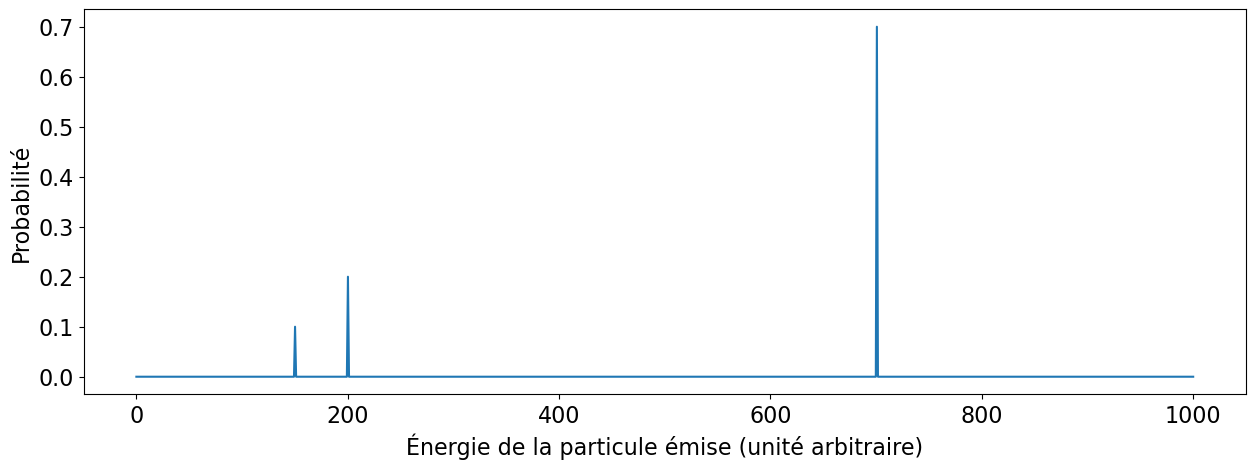

In [2]:
energie = np.linspace(0, 1000, 1000)
spectre = np.zeros(1000)
spectre[700] = 0.7
spectre[200] = 0.2
spectre[150] = 0.1
plt.plot(energie, spectre)
plt.xlabel("Énergie de la particule émise (unité arbitraire)")
plt.ylabel("Probabilité")
plt.show()

**Chaînes de désintégration** Il arrive souvent qu'un noyau se désintègre vers un état instable d'un autre noyau. Ce dernier se désintègre alors à son tour, ajoutant des lignes au spectre du premier. Par exemple, on observe des photons dans les produits de désintégration du ${}^{60}\mathrm{Co}$. La première désintégration est une $\beta^-$:

$$ {}^{60}_{27}\mathrm{Co} \to  {}^{60}_{28}\mathrm{Ni}^{**} +e^- +\bar\nu_e$$

Ensuite, le noyau de nickel excité (${}^{60}\mathrm{Ni}^{**}$) se désexcite en émettant un rayonnement $\gamma$. Dans le canal de désintégration principal, ce processus ce fait en deux étapes :

$$ {}^{60}\mathrm{Ni}^{**} \to {}^{60}\mathrm{Ni}^{*} +\gamma \to {}^{60}\mathrm{Ni}+2\gamma $$

Le premier photon émis a une énergie de 1173 keV et le second une énergie de 1332 keV (voir table de désintégration). Ces deux dernières réactions ayant lieu en un temps très court (de l'ordre de la picoseconde), les pics correspondants sont souvent inclus dans le spectre du ${}^{60}\mathrm{Co}$. 


Si on reprend notre exemple précédent et qu'on suppose que le canal à 70% mène à un noyau qui peut se désexciter de deux façons différentes, on obtient le spectre suivant :

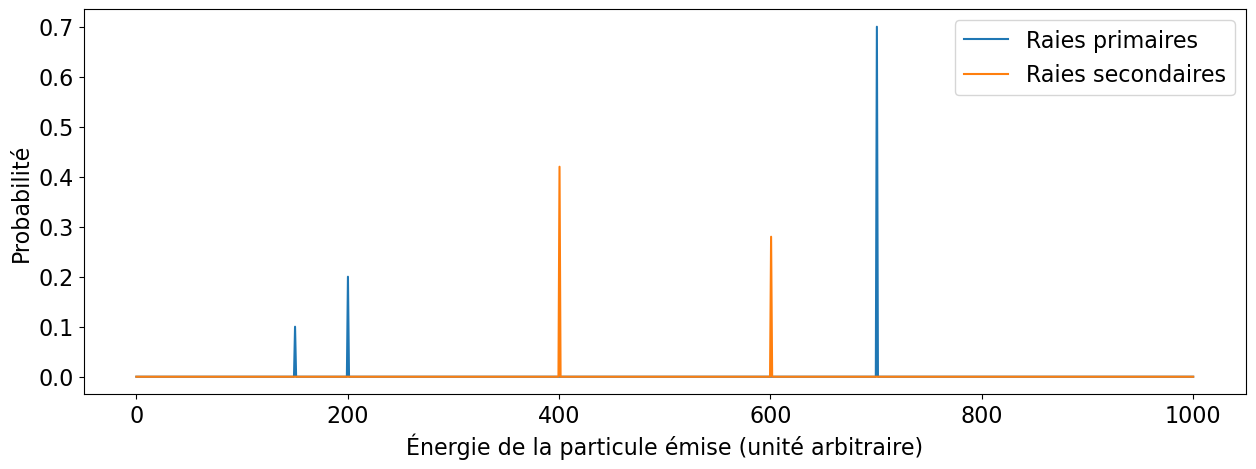

In [3]:
energie = np.linspace(0, 1000, 1000)
spectre = np.zeros(1000)
spectre[700] = 0.7
spectre[200] = 0.2
spectre[150] = 0.1
plt.plot(energie, spectre)
spectre = np.zeros(1000)
spectre[600] = 0.7*0.4
spectre[400] = 0.7*0.6
plt.plot(energie, spectre)
plt.legend(("Raies primaires", "Raies secondaires"))
plt.xlabel("Énergie de la particule émise (unité arbitraire)")
plt.ylabel("Probabilité")
plt.show()

### Résolution du détecteur

En pratique, les pics que l'on mesure avec un détecteur ne sont pas parfait dû à différents effets expérimentaux. Il est alors important de les comprendre afin de pouvoir analyser et interpreter les données correctement. Pour cela, il faut notamment prendre en compte le fait qu'un détecteur n'est jamais parfait. Cela se manifeste notamment dans la largeur des pics. Par exemple, dans un vrai détecteur, le spectre pris en exemple précédemment prend la forme suivante :

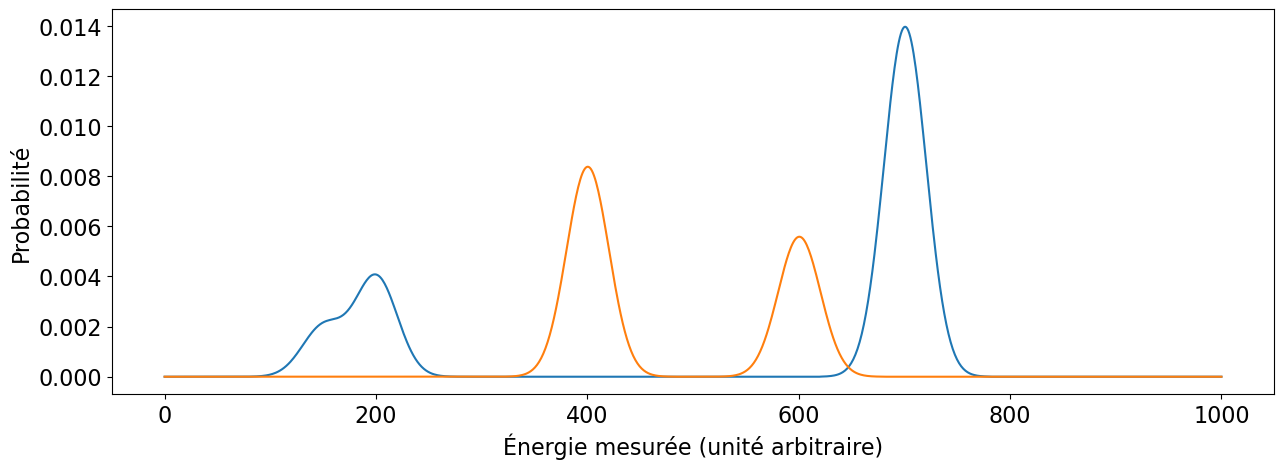

In [4]:
energie = np.linspace(0, 1000, 1000)
spectre1 = np.zeros(1000)
spectre1[700] = 0.7
spectre1[200] = 0.2
spectre1[150] = 0.1
plt.plot(energie, gaussian_filter(spectre1, 20))
spectre2 = np.zeros(1000)
spectre2[600] = 0.7*0.4
spectre2[400] = 0.7*0.6
plt.plot(energie, gaussian_filter(spectre2, 20))
plt.xlabel("Énergie mesurée (unité arbitraire)")
plt.ylabel("Probabilité")
plt.show()

La largeur des pics est donnée par la **résolution en énergie du système**, $\sigma_E$ et la **resolution relative** $\sigma_E/E$.

Normalement, la résolution en énergie d'un appareil n'est pas constante et l'évolution de la résolution avec l'énergie est une des mesures les plus importantes pour la caractérisation des détecteurs. La résolution que l'on mesure est la résolution de tout le système comprenant aussi l'électronique.

<div class="alert alert-block alert-info">
<b>Q:</b> Quelle est la résolution nécessaire pour pouvoir séparer deux pics?
</div>


### Bruit de fond 

Un deuxième effet expérimental important est la présence de bruit de fond, causé par deux facteurs principaux:

- **L'environnement**: Notre système n'étant pas totalement isolé du reste du monde, il détectera aussi des particules ne provenant pas de la source. En particulier, le coffrage de plomb qui l'entoure émet des rayons X suite à une exposition prolongée aux sources. La seule présence dans la pièce d'une personne ayant subi un examen de radiologie peut empêcher le système de fonctionner correctement; activer le WiFi sur un ordinateur modifie également le bruit.

- **L'électronique**: Les composants électroniques du système d'acquisition utilisé produisent des fluctuations du signal visible dans les plus petites valeurs du signal. Ces fluctuations sont enleves autant que possible en utilisant un seuil (comme pour le trigger de l'oscilloscope).

La combinaison des différents bruits de fond s'ajoute aux pics dues à la source que l'on souhaite mesurer, avec une contribution qui décroît typiquement avec l'énergie mesurée:

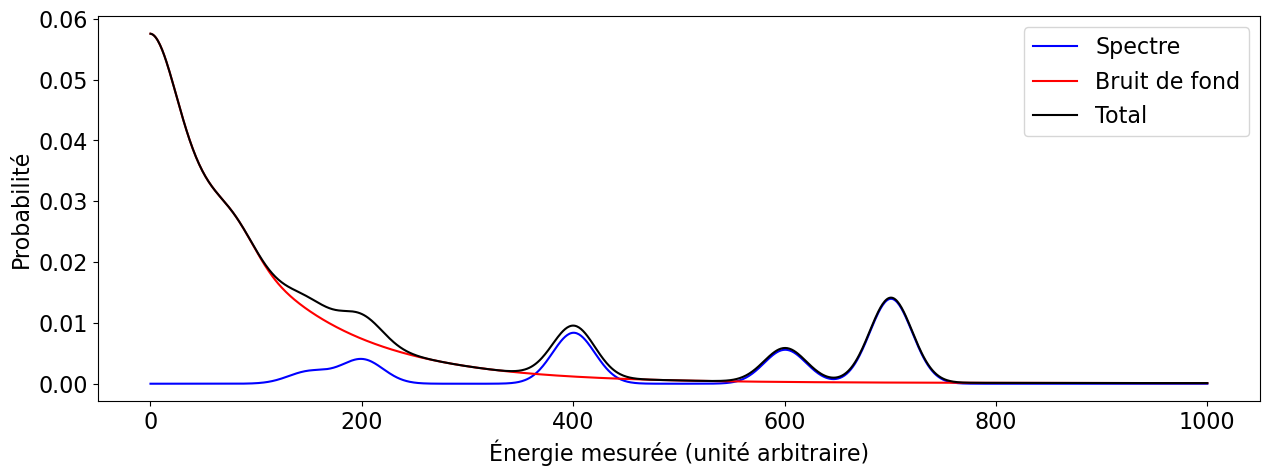

In [5]:
energie = np.linspace(0, 1000, 1000)
spectre = np.zeros(1000)
spectre[700] = 0.7
spectre[200] = 0.2
spectre[150] = 0.1
spectre[600] = 0.7*0.4
spectre[400] = 0.7*0.6
plt.plot(energie, gaussian_filter(spectre, 20), color='blue')
bruit = np.zeros(1000)
bruit = np.exp(-energie / 100 - 3) + 0.1 / (energie + 1)
bruit[80] = 0.2
plt.plot(energie, gaussian_filter(bruit, 20), color='red')
plt.plot(energie, gaussian_filter(spectre + bruit, 20), color='black')
plt.legend(('Spectre', 'Bruit de fond', 'Total'))
plt.xlabel("Énergie mesurée (unité arbitraire)")
plt.ylabel("Probabilité")
plt.show()

Le spectre du bruit de fond peut être mesuré en prenant des données lorsqu'aucune source n'est présente. Il est alors possible de soustraire sa contribution aux données mesurées avec une source.
<div class="alert alert-block alert-info">
  <b>Q&nbsp;:</b> À quelles énergies sont émis les rayons X provenant du plomb ?
</div>

## Diffusion Compton

Un dernier effet important est l'interaction des photons incidents avec la matière. En particulier, les photons émis par les sources peuvent entrer en collision avec les électrons du milieu. Ce phénomène est appelé "diffusion Compton". Lors de la collision, le photon va perdre de l'énergie que l'on peut calculer avec la formule suivante :

$$ \frac{1}{E_{f}} - \frac{1}{E_{i}} = \frac{1}{m_e c^2} (1- \cos \theta ) $$

où $E_{f}$ est l'énergie du photon final, $E_{i}$ est l'énergie du photon initial, $m_e = 511\,\mathrm{keV}/c^2$ est la masse de l'électron  et $\theta$ est l'angle de déviation du photon.

<center>
  <img src="images/DiffusionCompton.png" alt="Compton" width="400"/>
</center>

<div class="alert alert-block alert-info">
<b>Q:</b> Quelle est l'énergie maximale (en fonction de l'énergie initiale) que l'on peut transmettre à l'électron par l'effet Compton? 
</div>


Dans le spectre, cela crée un "plateau Compton" avant chaque pic. A noter que, puisque le phénomène se produit également dans le détecteur, les électrons diffusés seront également détectés. Avec quelques calculs supplémentaires, on peut trouver la forme du plateau Compton et les différentes contributions associées (notez que, pour obtenir le graphe ci-dessous, certains paramètres ont été définis arbitrairement):


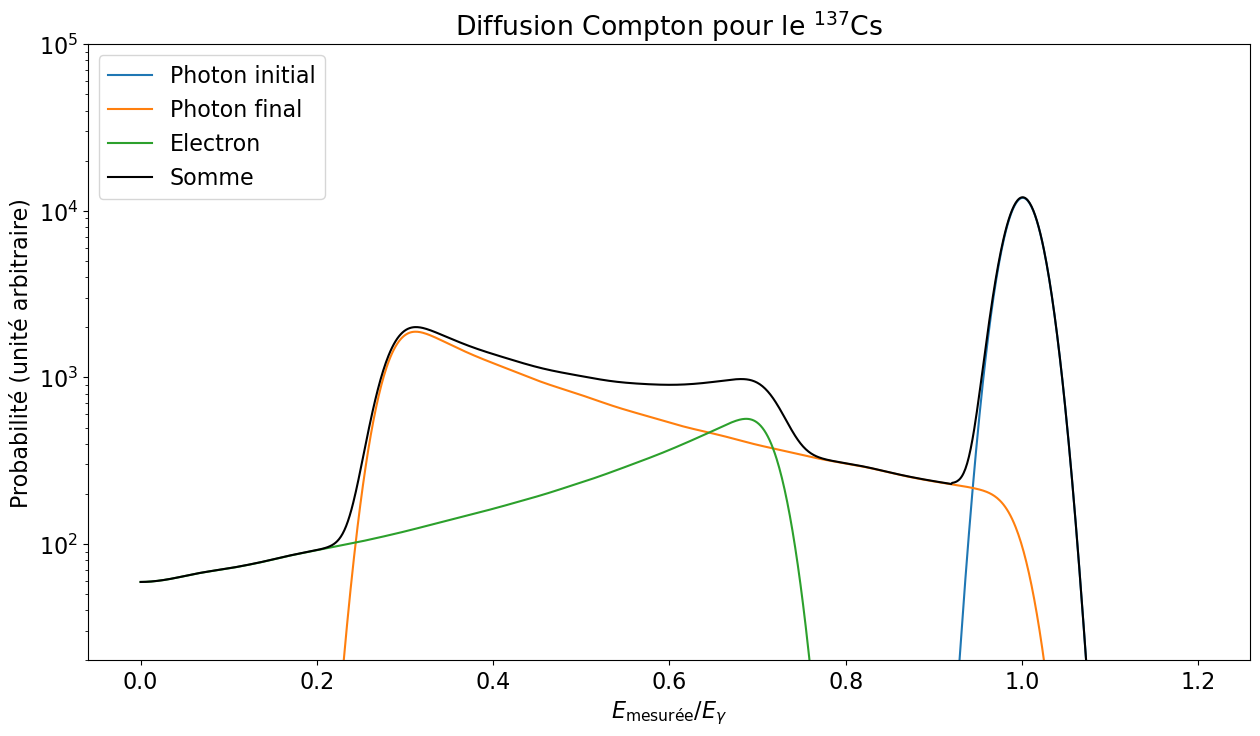

In [6]:
E = 661
bins = np.linspace(0, 1.2, 1200)
N = int(1e6)

prop = np.random.rand(N)

plt.figure(figsize = (15.0, 8.0))

peak = bins.copy()[:-1]
peak[1000] = 0.6 * N
plt.semilogy(bins[:-1], gaussian_filter(peak, sigma=20))

costheta = 1 - 2*np.random.rand(N)

egamma = 511/(511+E*(1-costheta))

egammaCount, egammaEdges = np.histogram(egamma, bins=bins, weights=prop)
plt.semilogy(bins[:-1], gaussian_filter(egammaCount, sigma=20))

costheta = 1 - 2*np.random.rand(N)
ee = 1 - 511/(511+E*(1-costheta))
eeCount, eeEdges = np.histogram(ee, bins=bins, weights=1-prop)
eeCount *= 0.3
plt.semilogy(bins[:-1], gaussian_filter(eeCount, sigma=20))

total = egammaCount + eeCount + peak
plt.semilogy(bins[:-1], gaussian_filter(total, sigma=20), color='black')

plt.title(r'Diffusion Compton pour le ${}^{137}\mathrm{Cs}$')
plt.xlabel(r'$E_\mathrm{mesurée}/E_\gamma$')
plt.ylabel('Probabilité (unité arbitraire)')
plt.ylim((20, 1e5))
plt.legend(('Photon initial', 'Photon final', 'Electron', 'Somme'))
plt.show()